In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
udata = pd.read_csv('uber_ride.csv')

In [3]:
udata

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
udata.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
## Deleting last row as least null values is there.

In [7]:
udata.drop(udata.tail(1).index, inplace=True)

In [8]:
udata.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [9]:
udata.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [10]:
udata.shape

(1155, 7)

In [11]:
udata.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [13]:
udata['START_DATE*']=udata['START_DATE*'].astype('datetime64[ns]')
udata['END_DATE*']=udata['END_DATE*'].astype('datetime64[ns]')


In [ ]:
## Presenting the time in a valuable way

In [17]:
udata['duration']= udata['END_DATE*']-udata['START_DATE*']
udata['duration']= udata['duration'].dt.total_seconds()/60.0
udata['duration']= udata['duration'].astype('float')
udata['speed']=udata['MILES*']/(udata['duration']/60)

In [ ]:
## Adding two new variable i.e duration and speed.

In [18]:
udata

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,durattion,duration,speed
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,6.0,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,00:12:00,12.0,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,13.0,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,14.0,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00,67.0,57.044776
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,7.0,6.000000
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,00:18:00,18.0,13.000000
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,00:35:00,35.0,27.771429
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,00:18:00,18.0,21.333333


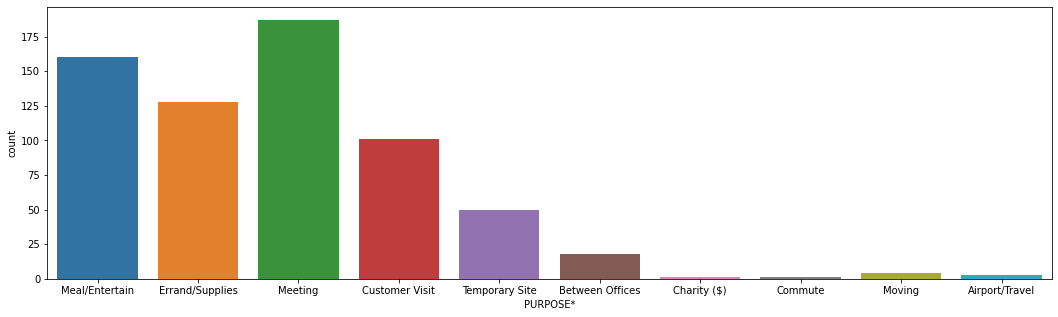

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(udata['PURPOSE*'], )

In [19]:
gr=udata.groupby(['PURPOSE*']).mean()
print(gr)

                     MILES*    duration      speed
PURPOSE*                                          
Airport/Travel     5.500000   26.000000  13.531575
Between Offices   10.944444   25.500000  25.622915
Charity ($)       15.100000   27.000000  33.555556
Commute          180.200000  185.000000  58.443243
Customer Visit    20.688119   33.415842  30.294273
Errand/Supplies    3.968750   12.976562  19.463559
Meal/Entertain     5.698125   16.125000  21.759906
Meeting           15.247594   29.737968  28.545516
Moving             4.550000   15.000000  18.388393
Temporary Site    10.474000   25.860000  29.152836


In [ ]:
## The above data table tells us the average time that can be taken w.r.t speed and distance for different places.

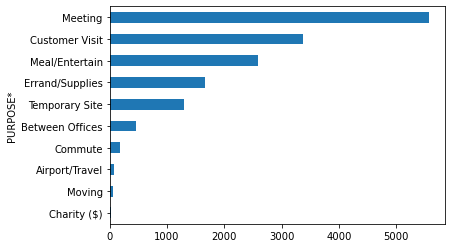

In [26]:
udata.groupby(['PURPOSE*'])['duration'].sum().sort_values(ascending=True).plot(kind='barh',)

In [27]:
## The above figure shows the total number of ride taken for each loctaion


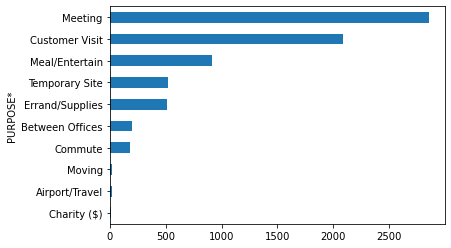

In [28]:
udata.groupby(['PURPOSE*'])['MILES*'].sum().sort_values(ascending=True).plot(kind='barh',)

In [29]:
## The above table shows the total number of miles driven for each loction

In [31]:
udata['speed'].median()

21.0

In [38]:
## Creating Columns for Month and Hour in a Day
udata['month']=udata['START_DATE*'].dt.month
udata['hour']=udata['START_DATE*'].dt.hour

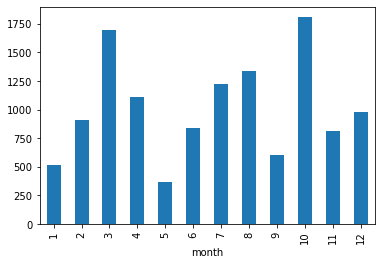

In [40]:
udata.groupby('month')['MILES*'].sum().plot(kind='bar',)

In [41]:
## From above table we can conclude that,the highest number of ride is in month 10.

Text(0.5, 1.0, 'Number of rides in particular hour')

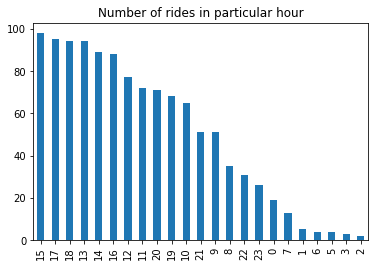

In [50]:
udata['hour'].value_counts().plot(kind='bar')
plt.title('Number of rides in particular hour')

In [ ]:
## So, from above table we can conclude that the most drives are taken from 9am to 9 pm.